In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")
list_merged_df = pd.read_csv("data/merged_df.csv")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [7]:
a = application.groupby(['REGION_RATING_CLIENT','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('TOTALCOUNT',ascending=False)[:10]
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,REGION_RATING_CLIENT,TOTALCOUNT,DEFAULTER_RATES
1,2,73.813,7.889
2,3,15.717,11.103
0,1,10.470,4.820


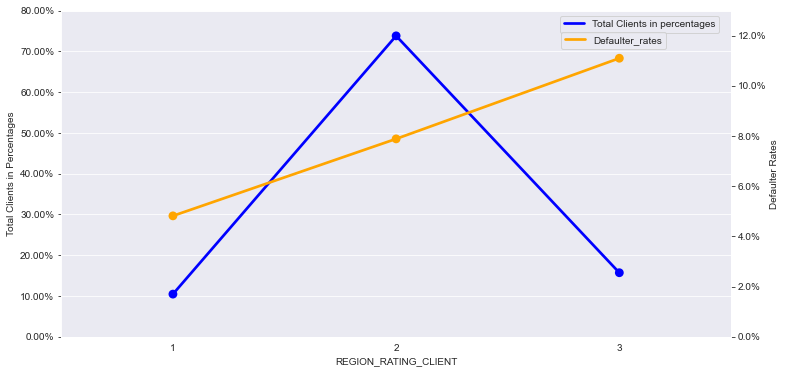

In [18]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(12,6))


sns.pointplot(x='REGION_RATING_CLIENT',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,80))
ax2 = ax1.twinx()


sns.pointplot(x='REGION_RATING_CLIENT',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.91,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylabel='Defaulter Rates',ylim=(0,13))
ax2.grid(None)

plt.show()

In [20]:
a = application.groupby(['REG_CITY_NOT_LIVE_CITY','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('TOTALCOUNT',ascending=False)[:10]
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,REG_CITY_NOT_LIVE_CITY,TOTALCOUNT,DEFAULTER_RATES
0,0,92.183,7.721
1,1,7.817,12.226


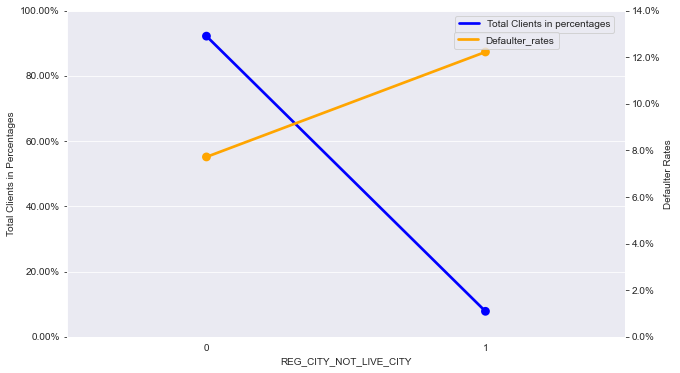

In [26]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='REG_CITY_NOT_LIVE_CITY',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,100))
ax2 = ax1.twinx()


sns.pointplot(x='REG_CITY_NOT_LIVE_CITY',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.89,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylabel='Defaulter Rates',ylim=(0,14))
ax2.grid(None)

plt.show()

In [20]:
a = application.groupby(['REG_CITY_NOT_LIVE_CITY','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('TOTALCOUNT',ascending=False)[:10]
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,REG_CITY_NOT_LIVE_CITY,TOTALCOUNT,DEFAULTER_RATES
0,0,92.183,7.721
1,1,7.817,12.226


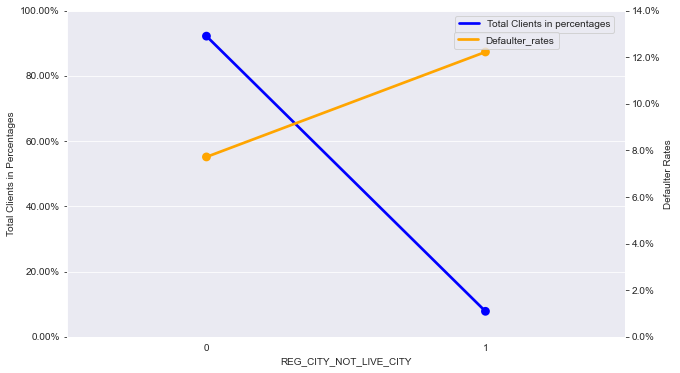

In [26]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='REG_CITY_NOT_LIVE_CITY',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,100))
ax2 = ax1.twinx()


sns.pointplot(x='REG_CITY_NOT_LIVE_CITY',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.89,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylabel='Defaulter Rates',ylim=(0,14))
ax2.grid(None)

plt.show()